In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

Bài 1: Implement thuật toán gradient descent tìm giá trị nhỏ nhất hàm f(x)=x^2, thử các giá trị learning_rate khác nhau (nhỏ, vừa, lớn, rất lớn), vẽ đồ thị loss function theo epoch tương ứng.

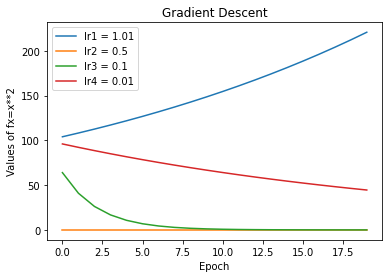

In [ ]:
def d(x):
    return 2*x

def f(x):
    return x**2
    
lr1 = 1.01
lr2 = 0.5
lr3 = 0.1
lr4 = 0.01
epoch = 20

x1, x2, x3, x4 = 10, 10, 10, 10
fx1 = np.ones((epoch))
fx2, fx3, fx4 = fx1.copy(), fx1.copy(), fx1.copy()

for i in range (epoch):
    x1 = x1 - lr1*d(x1)
    fx1[i] *= f(x1)
    x2 = x2 - lr2*d(x2)
    fx2[i] *= f(x2)
    x3 = x3 - lr3*d(x3)
    fx3[i] *= f(x3)
    x4 = x4 - lr4*d(x4)
    fx4[i] *= f(x4)

plt.plot(fx1, label='lr1 = 1.01')
plt.plot(fx2, label='lr2 = 0.5')
plt.plot(fx3, label='lr3 = 0.1')
plt.plot(fx4, label='lr4 = 0.01')
plt.title('Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Values of fx=x**2')
plt.legend()

    
    

Bài 2: Tự biểu diễn lại bài toán, bắt đầu từ 1 điểm dữ liệu (xi, yi) -> model, loss function, đạo hàm với từng biến. Xong biểu diễn dưới dạng vector. Tính đạo hàm của cả ma trận W với loss function thay vì từng thành phần w0, w1. Chứng minh lại: dJ/dW = X.T * (Y^-Y) 

Bai 3: Hiểu code phần thực hành cho linear regression. Vẽ thêm biểu đồ cho loss function theo epoch. Thay đổi các giá trị learning_rate khác nhau xem đồ thị loss trông thế nào.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# vector presentation
epoch = 30
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_linear.csv').values

x = data[:, 0].reshape(-1, 1)
n = x.shape[0]
y = data[:, 1].reshape(-1, 1) # vector Y
b = np.ones((n, 1)) # bias
x = np.hstack((b, x)) # matrix X
w = np.array([1, 1]).reshape(-1, 1) # vector W

In [ ]:
def dh(x, y_hat, y):
    return ((x.T).dot(y_hat - y))/n  # dao ham x.T * (y_hat - y)/n
y_hat = np.dot(x, w)

# Tinh dao ham cua loss function voi ma tran W
L = np.array([0., 0.])
L[0] = (1/n)*(np.sum(y_hat - y))
x1 = x[:, 1].copy()
L[1] = (1/n)*np.sum(np.multiply((y_hat - y), x1.reshape(-1, 1)))
L = L.reshape(-1, 1)
print(L)

# Tinh dao ham theo cong thuc x.T*(y_hat - y)
L1 = dh(x, y_hat, y)
print(L1)
# ===> L = L1 => chung minh xong cong thuc


[[  -915.65663333]
 [-65720.73582543]]
[[  -915.65663333]
 [-65720.73582543]]


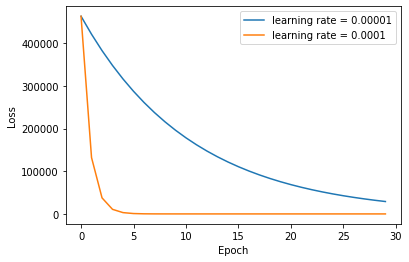

In [ ]:
loss = np.zeros((epoch, 1)) # loss
lr = 0.0001
y_hat = np.dot(x, w)
lr2 = 0.00001
w2 = w.copy()
y_hat2 = y_hat.copy()
loss2 = loss.copy()

for i in range (0, epoch):
    y_hat = np.dot(x, w) # update value of y_hat
    w = w - lr*dh(x, y_hat, y) # update value of w with Gradient Descent
    loss[i] = 0.5*np.sum((y_hat - y)**2)/n # calculate cost
    y_hat2 = np.dot(x, w2)
    w2 = w2 - lr2*dh(x, y_hat2, y)
    loss2[i]= 0.5*np.sum((y_hat2 - y)**2)/n

plt.plot(loss2, label='learning rate = 0.00001')
plt.plot(loss, label='learning rate = 0.0001')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Bai 4: Dùng thuật toán gradient descent với dữ liệu data_square 

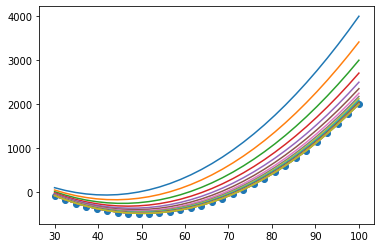

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_square.csv').values

epoch = 30
x = df[:, 0].reshape(-1, 1)
y = df[:, 1].reshape(-1, 1)
w = np.array([2021, -100, 10]).reshape(-1, 1)
n = x.shape[0]

b = np.ones((n, 1))
x2 = x*x
x = np.hstack((b, x, x2))

# tinh loss dung gradient descent
lrate = 0.00000001 
Loss = np.ones((epoch, 1))
x_predict = x[:, 1].copy().reshape(-1, 1)
plt.scatter(x_predict, y)
for i in range(epoch):
    y_mu = x.dot(w)
    w = w - lrate*(x.T.dot(y_mu - y))/n     # Gradient Descent
    Loss[i] = (0.5/n)*np.sum((y_mu - y)**2)
    if i>10:
        plt.plot(x_predict, y_mu)
y_mu = x.dot(w)
# print(Loss)
# plt.plot(Loss)

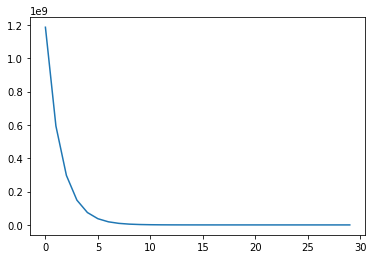

In [24]:
plt.plot(Loss)

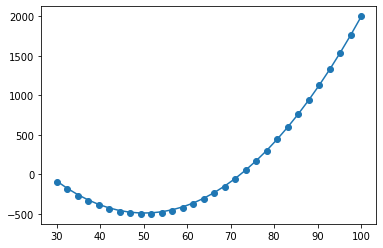

In [25]:
x_predict = x[:, 1].copy().reshape(-1, 1)
plt.scatter(x_predict, y)
plt.plot(x_predict, y_mu)

Bai 5:[Optional] Biểu diễn bài toán dưới dạng ma trận rồi tìm W để minimize J bằng đại số tuyến tính.

In [33]:
# tối ưu w bằng đại số tuyến tính
# chọn w sao cho biểu diễn y_hat = x*w xấp xỉ y nhất
# => y_hat là hình chiếu của y trong 1 siêu phẳng n chiều(tương đương với n điểm dữ liệu)
# => x.T.(y_hat - y) = 0 <=> ... <=> w = (x.T.x)^-1 .x.T.y
import numpy as np

W = (x.T.dot(x))
W = np.linalg.inv(W)
W = (W.dot(x.T)).dot(y)
print(W)

# tính loss thử
Y_hat = x.dot(W)
Cost = 0.5*(1/n)*np.sum((Y_hat - y)**2)
print(Cost)

[[ 2.00000579e+03]
 [-1.00000222e+02]
 [ 1.00000199e+00]]
1.303249001927151e-06
